# Анализ успешности компьютерных игр

## Описание проекта
Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.
Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.

## Описание данных

- `Name` — название игры
- `Platform` — платформа
- `Year_of_Release` — год выпуска
- `Genre` — жанр игры
- `NA_sales` — продажи в Северной Америке (миллионы проданных копий)
- `EU_sales` — продажи в Европе (миллионы проданных копий)
- `JP_sales` — продажи в Японии (миллионы проданных копий)
- `Other_sales` — продажи в других странах (миллионы проданных копий)
- `Critic_Score` — оценка критиков (максимум 100)
- `User_Score` — оценка пользователей (максимум 10)
- `Rating` — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

Данные за 2016 год могут быть неполными.


## План исследования

- [1. Исследовательский анализ данных](#глава1)  
    - [1.1 Загрузка данных](#раздел1.1)  
    - [1.2 Информациях об играх](#раздел1.2)  
    - [1.3 Предобработка данных](#раздел1.3)
    - [1.3.1 Переименование столбцов](#раздел1.3.1)
      - [1.3.2 Поиск артефактов](#раздел1.3.2)
      - [1.3.3 Заполнение пропусков](#раздел1.3.3)
      - [1.3.4 Изменение типов данных](#раздел1.3.4)
      - [1.3.5 Поиск дубликатов](#раздел1.3.5)
      - [1.3.6 Общие продажи](#раздел1.3.6)
- [2. Исследовательский анализ данных](#глава2)  
    - [2.1 Продажи игр по годам](#раздел2.1)  
    - [2.2 Продажи игр наиболее популярных платформ по годам](#раздел2.2)  
    - [2.3 Актуальные данные](#раздел2.3)  
- [3. Портрет пользователя каждого региона](#глава3)  
    - [3.1 Североамериканский регион](#раздел3.1)
      - [3.1.1 Самые популярные платформы](#раздел3.1.1)
      - [3.1.2 Популярные жанры](#раздел3.1.2)
      - [3.1.3 Влияние рейтинга на продажи](#раздел3.1.3)
    - [3.2 Европейский регион](#раздел3.2) 
        - [3.2.1 Самые популярные платформы](#раздел3.2.1)
        - [3.2.2 Популярные жанры](#раздел3.2.2)
        - [3.2.3 Влияние рейтинга на продажи](#раздел3.2.3)    
    - [3.3 Японский регион](#раздел3.2) 
        - [3.2.1 Самые популярные платформы](#раздел3.2.1)
        - [3.2.2 Популярные жанры](#раздел3.2.2)
        - [3.2.3 Влияние рейтинга на продажи](#раздел3.2.3)
- [4. Проверка гипотез](#глава4)
    - [4.1 Перввая гипотеза - Средние пользовательские рейтинги платформ Xbox One и PC одинаковые](#раздел4.1)
    - [4.2 Вторая гипотеза - Средние пользовательские рейтинги жанров Action и Sports разные](#раздел4.2)    
- [5. Выводы](#глава5)  

<a id='глава1'></a>
# 1. Исследовательский анализ данных

<a id='раздел1.1'></a>
## 1.1 Загрузка данных

Выгрузим данные таблицы в следующий датафрейм:

data - games.csv

In [1]:
# Импорт необходимых библиотек
import os
import pandas as pd
import numpy as np
from scipy import stats as st
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

In [2]:
# Загрузка файла данных

data_path_local = 'C:/Users/Asus3/Documents/Яндекс.Практикум/projects/data/project_5/games.csv'
'''
#данные локально
data_path_local = 'C:/Users/ruleva_ad/Desktop/projects/data/project_5/games.csv'

data_path_local = 'C:/Users/Maroznik/Documents/dev/Яндекс.Практикум/projects/data/project_5/games.csv'
'''
#данные на сервере
data_path_server = '/datasets/games.csv'
#чтение из файла   
if os.path.exists(data_path_local):
    data = pd.read_csv(data_path_local, sep=',')
    print('Успешное чтение файлов')
elif os.path.exists(data_path_server):
    data = pd.read_csv(data_path_server, sep=',')
else:
    print('Путь к файлу не найден')

Успешное чтение файлов


In [3]:
pd.set_option('display.max_columns', None)

<a id='раздел1.2'></a>
## 1.2 Информация об играх:

In [4]:
data

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


### Вывод

При первичном изучении датафрейма обнаружены следующие недостатки, которые необходимо устранить:
1. Записать названия столбцов по правилам змеиного регистра;
2. Найти возможные артефакты в столбцах и избавиться от них;
3. Избавиться от пропусков в столбцах ;
4. Преобразовать типы;
5. Проверить на наличие дубликатов и удалить их, если они обнаружатся.

<a id='раздел1.3'></a>
## 1.3 Предобработка данных

<a id='раздел1.3.1'></a>
### 1.3.1 Переименование столбцов

Запишем названия всех столбцов по правилам змеиного регистра. Для этого достаточно привести их к нижнему регистру:

In [6]:
data.columns = data.columns.str.lower()

In [7]:
display(data)
data.info()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


**Вывод**

Устранена проблема регистра в названии столбцов

<a id='раздел1.3.2'></a>
###  1.3.2 Поиск артефактов

<a id='раздел1.3.2.1'></a>
#### 1.3.2.1 Столбец `name`. 
Поскольку название игры может быть любым, то артефакты, даже если они существуют, найти не представляется возможным:

In [8]:
print('Множество значений в столбце "name" :\n', data['name'].unique())

Множество значений в столбце "name" :
 ['Wii Sports' 'Super Mario Bros.' 'Mario Kart Wii' ...
 'Woody Woodpecker in Crazy Castle 5' 'LMA Manager 2007'
 'Haitaka no Psychedelica']


<a id='раздел1.3.2.2'></a>
#### 1.3.2.2 Столбец `platform`:

In [9]:
print('Множество значений в столбце "platform" :\n', data['platform'].unique())

Множество значений в столбце "platform" :
 ['Wii' 'NES' 'GB' 'DS' 'X360' 'PS3' 'PS2' 'SNES' 'GBA' 'PS4' '3DS' 'N64'
 'PS' 'XB' 'PC' '2600' 'PSP' 'XOne' 'WiiU' 'GC' 'GEN' 'DC' 'PSV' 'SAT'
 'SCD' 'WS' 'NG' 'TG16' '3DO' 'GG' 'PCFX']


Аномальных значений не обнаружено.

<a id='раздел1.3.2.3'></a>
#### 1.3.2.3 Столбец `year_of_release`:

In [10]:
print('Множество значений в столбце "year_of_release" :\n', data['year_of_release'].unique())

Множество значений в столбце "year_of_release" :
 [2006. 1985. 2008. 2009. 1996. 1989. 1984. 2005. 1999. 2007. 2010. 2013.
 2004. 1990. 1988. 2002. 2001. 2011. 1998. 2015. 2012. 2014. 1992. 1997.
 1993. 1994. 1982. 2016. 2003. 1986. 2000.   nan 1995. 1991. 1981. 1987.
 1980. 1983.]


Видим, что в столбце присутствуют пропуски. Аномальных значений не обнаружено.

<a id='раздел1.3.2.4'></a>
#### 1.3.2.4 Столбец `genre`:

In [11]:
print('Множество значений в столбце "genre" :\n', data['genre'].unique())

Множество значений в столбце "genre" :
 ['Sports' 'Platform' 'Racing' 'Role-Playing' 'Puzzle' 'Misc' 'Shooter'
 'Simulation' 'Action' 'Fighting' 'Adventure' 'Strategy' nan]


Аномальных значений не обнаружено.

<a id='раздел1.3.2.5'></a>
#### 1.3.2.5 Столбец `na_sales`:

In [12]:
#print('Множество значений в столбце "na_sales" :\n', data['na_sales'].unique())
# print('Минимальное значение в столбце "na_sales" =', data['na_sales'].min())
# print('Максимальное значение в столбце "na_sales" =', data['na_sales'].max())

In [13]:
data['na_sales'].describe()

count    16715.000000
mean         0.263377
std          0.813604
min          0.000000
25%          0.000000
50%          0.080000
75%          0.240000
max         41.360000
Name: na_sales, dtype: float64

Text(0.5, 1.0, 'Продажи в Северной Америке')

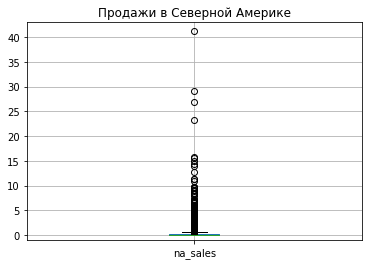

In [14]:
plt.ylim(-1, 43)
data.boxplot(column=['na_sales'])
plt.title('Продажи в Северной Америке')

Видим, что в столбце присутствуют выбросы, избавимся от выбивающихся значений, чтобы получить более правильную и четкую картину.

Минимальное значение - 0

Максимальное значение - 41.36

Удалим выбивающиеся значения в столбце `na_sales`

In [15]:
data = data[(data['na_sales'] <= 20)]
data['na_sales'].describe()

count    16711.000000
mean         0.256225
std          0.661249
min          0.000000
25%          0.000000
50%          0.080000
75%          0.240000
max         15.680000
Name: na_sales, dtype: float64

<a id='раздел1.3.2.6'></a>
#### 1.3.2.6 Столбец `eu_sales`:

In [16]:
# eu_sales
#print('Минимальное значение в столбце "eu_sales" =', data['eu_sales'].min())
#print('Максимальное значение в столбце "eu_sales" =', data['eu_sales'].max())

In [17]:
data['eu_sales'].describe()

count    16711.000000
mean         0.142974
std          0.450255
min          0.000000
25%          0.000000
50%          0.020000
75%          0.110000
max         12.760000
Name: eu_sales, dtype: float64

Text(0.5, 1.0, 'Продажи в Европе')

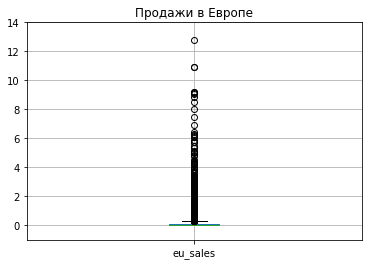

In [18]:
plt.ylim(-1, 14)
data.boxplot(column=['eu_sales'])
plt.title('Продажи в Европе')

Продажи в Европе ниже, чем продажи в Америке, выбросов немного, избавимся от них.

In [19]:
data = data[(data['eu_sales'] <= 10)]
data['eu_sales'].describe()

count    16708.000000
mean         0.140927
std          0.423412
min          0.000000
25%          0.000000
50%          0.020000
75%          0.110000
max          9.200000
Name: eu_sales, dtype: float64

<a id='раздел1.3.2.7'></a>
#### 1.3.2.7 Столбец `jp_sales`:

In [20]:
# print('Минимальное значение в столбце "jp_sales" =', data['jp_sales'].min())
# print('Максимальное значение в столбце "jp_sales" =', data['jp_sales'].max())
data['jp_sales'].describe()

count    16708.000000
mean         0.076208
std          0.298707
min          0.000000
25%          0.000000
50%          0.000000
75%          0.040000
max         10.220000
Name: jp_sales, dtype: float64

<AxesSubplot:>

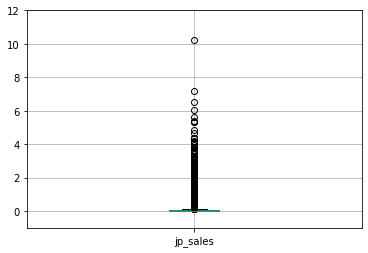

In [21]:
plt.ylim(-1, 12)
data.boxplot(column=['jp_sales'])

<a id='раздел1.3.2.8'></a>
#### 1.3.2.8 Столбец `other_sales`:

In [22]:
# print('Минимальное значение в столбце "other_sales" =', data['other_sales'].min())
# print('Максимальное значение в столбце "other_sales" =', data['other_sales'].max())
data['other_sales'].describe()

count    16708.00000
mean         0.04621
std          0.17038
min          0.00000
25%          0.00000
50%          0.01000
75%          0.03000
max         10.57000
Name: other_sales, dtype: float64

<AxesSubplot:>

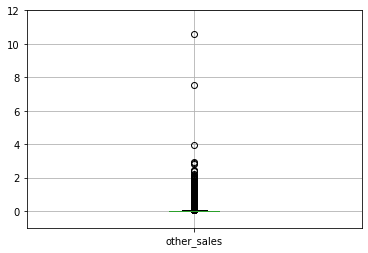

In [23]:
plt.ylim(-1, 12)
data.boxplot(column=['other_sales'])

<a id='раздел1.3.2.9'></a>
#### 1.3.2.9 Столбец `critic_score`:

In [24]:
# print('Минимальное значение в столбце "critic_score" =', data['critic_score'].min())
# print('Максимальное значение в столбце "critic_score" =', data['critic_score'].max())
data['critic_score'].describe()

count    8134.000000
mean       68.963855
std        13.939231
min        13.000000
25%        60.000000
50%        71.000000
75%        79.000000
max        98.000000
Name: critic_score, dtype: float64

Text(0.5, 1.0, 'Распределение оценок критиков')

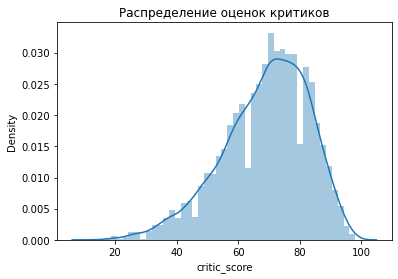

In [25]:
# plt.ylim(10, 100)
# data.boxplot(column=['critic_score'])
warnings.filterwarnings('ignore')

sns_plot = sns.distplot(data['critic_score'])
fig = sns_plot.get_figure()
plt.title('Распределение оценок критиков')

<a id='раздел1.3.2.10'></a>
#### 1.3.2.10 Столбец `user_score`:

In [26]:
print('Множество значений в столбце "user_score" :\n', data['user_score'].unique())

Множество значений в столбце "user_score" :
 [nan '8.5' '6.6' '8.4' '8.6' '7.7' '6.3' '7.4' '8.2' '9' '7.9' '8.1' '8.7'
 '7.1' '3.4' '5.3' '4.8' '3.2' '8.9' '6.4' '8.3' '7.8' '7.5' '2.6' '7.2'
 '9.2' '7' '7.3' '4.3' '7.6' '5.7' '5' '9.1' '8' '6.5' 'tbd' '8.8' '6.9'
 '9.4' '6.8' '6.1' '6.7' '5.4' '4' '4.9' '4.5' '9.3' '6.2' '4.2' '6' '3.7'
 '4.1' '5.8' '5.6' '5.5' '4.4' '4.6' '5.9' '3.9' '3.1' '2.9' '5.2' '3.3'
 '4.7' '5.1' '3.5' '2.5' '1.9' '3' '2.7' '2.2' '2' '9.5' '2.1' '3.6' '2.8'
 '1.8' '3.8' '0' '1.6' '9.6' '2.4' '1.7' '1.1' '0.3' '1.5' '0.7' '1.2'
 '2.3' '0.5' '1.3' '0.2' '0.6' '1.4' '0.9' '1' '9.7']


Аномальным является значение `tbd`. Это аббревиатура от 'to be determined'- будет определено, то есть один из вариантов обозначения пропуска, поэтому будем заментяь эти значения также, как и заполнять пропуски.

In [27]:
warnings.filterwarnings('ignore')
data.loc[(data.user_score == 'tbd'), 'user_score'] = np.nan
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16708 entries, 4 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16706 non-null  object 
 1   platform         16708 non-null  object 
 2   year_of_release  16439 non-null  float64
 3   genre            16706 non-null  object 
 4   na_sales         16708 non-null  float64
 5   eu_sales         16708 non-null  float64
 6   jp_sales         16708 non-null  float64
 7   other_sales      16708 non-null  float64
 8   critic_score     8134 non-null   float64
 9   user_score       7587 non-null   object 
 10  rating           9946 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


Text(0.5, 1.0, 'Распределение оценок пользователей')

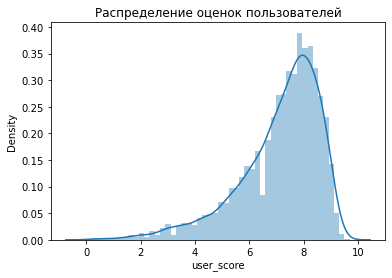

In [28]:
sns_plot = sns.distplot(data['user_score'])
fig = sns_plot.get_figure()
plt.title('Распределение оценок пользователей')

<a id='раздел1.3.2.11'></a>
#### 1.3.2.11 Столбец `rating`:

In [29]:
print('Множество значений в столбце "rating" :\n', data['rating'].unique())

Множество значений в столбце "rating" :
 [nan 'E' 'M' 'T' 'E10+' 'K-A' 'AO' 'EC' 'RP']


Аномальных значений не обнаружено, но есть неявный дубликат: 'E' ("Everyone", 1998-н.в.) и 'K-A' ("Kids to Adults", 1994-1997 гг.)- обозначение возрастной категории 6+. Заменим устаревшее значение на современное:

In [30]:
data.loc[(data.rating == 'K-A'), 'rating'] = 'E'
print('Множество значений в столбце "rating" :\n', data['rating'].unique())

Множество значений в столбце "rating" :
 [nan 'E' 'M' 'T' 'E10+' 'AO' 'EC' 'RP']


**Вывод**

Артефакты были найдены и устранены в столбцах `user_score` и `rating`

<a id='раздел1.3.3'></a>
### 1.3.3 Заполнение пропусков

<a id='раздел1.3.3.1'></a>
#### 1.3.3.1 Столбец `name`

In [31]:
data[data['name'].isna() > 0]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Таких строк всего две, при этом практически все данные об этих играх отсутствуют, и корректно заполнить все пропуски не представляется возможным. Поэтому удалим эти данные из рассмотрения.

In [32]:
data = data.dropna(subset=['name'])
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16706 entries, 4 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16706 non-null  object 
 1   platform         16706 non-null  object 
 2   year_of_release  16437 non-null  float64
 3   genre            16706 non-null  object 
 4   na_sales         16706 non-null  float64
 5   eu_sales         16706 non-null  float64
 6   jp_sales         16706 non-null  float64
 7   other_sales      16706 non-null  float64
 8   critic_score     8134 non-null   float64
 9   user_score       7587 non-null   object 
 10  rating           9946 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


<a id='раздел1.3.3.2'></a>
#### 1.3.3.2 Столбец `year_of_release`

Удалим пропуски в столбце `year_of_release`:

In [33]:
data = data.dropna(subset=['year_of_release']).reset_index(drop=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16437 entries, 0 to 16436
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16437 non-null  object 
 1   platform         16437 non-null  object 
 2   year_of_release  16437 non-null  float64
 3   genre            16437 non-null  object 
 4   na_sales         16437 non-null  float64
 5   eu_sales         16437 non-null  float64
 6   jp_sales         16437 non-null  float64
 7   other_sales      16437 non-null  float64
 8   critic_score     7980 non-null   float64
 9   user_score       7460 non-null   object 
 10  rating           9765 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


<a id='раздел1.3.3.3'></a>
#### 1.3.3.3 Столбцы `critic_score` и `user_score`.

Поменяем тип данных в столбце `user_score`:

In [34]:
data['user_score'] = pd.to_numeric(data['user_score'], errors = 'ignore')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16437 entries, 0 to 16436
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16437 non-null  object 
 1   platform         16437 non-null  object 
 2   year_of_release  16437 non-null  float64
 3   genre            16437 non-null  object 
 4   na_sales         16437 non-null  float64
 5   eu_sales         16437 non-null  float64
 6   jp_sales         16437 non-null  float64
 7   other_sales      16437 non-null  float64
 8   critic_score     7980 non-null   float64
 9   user_score       7460 non-null   float64
 10  rating           9765 non-null   object 
dtypes: float64(7), object(4)
memory usage: 1.4+ MB


In [35]:
warnings.filterwarnings('ignore')

Шкала оценок критиков от 0 до 100, а шкала оценок игроков от 0 до 10. Приведем к одной шкале (домножим значения столбца `user_score` на 10)

In [36]:
data['user_score'] = data['user_score'] * 10

In [37]:
data

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
1,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,85.0,E
2,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,66.0,E
3,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,84.0,E
4,Mario Kart DS,DS,2005.0,Racing,9.71,7.47,4.13,1.90,91.0,86.0,E
...,...,...,...,...,...,...,...,...,...,...,...
16432,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16433,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16434,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16435,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Выведем строки, где есть хотя бы одна оценка:

In [38]:
data[((data['critic_score'].isna() > 0) ^ (data['user_score'].isna() >0 ))]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
175,Tomb Raider II,PS,1997.0,Action,2.30,2.46,0.20,0.28,85.0,NaN,T
247,Call of Duty: Advanced Warfare,PS3,2014.0,Shooter,1.56,1.93,0.19,0.68,NaN,48.0,M
255,Call of Duty: Advanced Warfare,X360,2014.0,Shooter,2.77,1.11,0.00,0.40,NaN,49.0,M
256,FIFA 15,PS3,2014.0,Sports,0.58,3.02,0.04,0.64,NaN,45.0,E
283,World Soccer Winning Eleven 9,PS2,2005.0,Sports,0.12,2.26,0.90,0.77,NaN,82.0,E
...,...,...,...,...,...,...,...,...,...,...,...
16391,Super Robot Taisen: Original Generation,GBA,2002.0,Role-Playing,0.01,0.00,0.00,0.00,72.0,NaN,T
16403,Worms 2,PC,1997.0,Strategy,0.00,0.01,0.00,0.00,NaN,81.0,E
16417,Planet Monsters,GBA,2001.0,Action,0.01,0.00,0.00,0.00,67.0,NaN,E
16419,Bust-A-Move 3000,GC,2003.0,Puzzle,0.01,0.00,0.00,0.00,53.0,NaN,E


Для заполнения пропусков в данных строках и столбцах выдвенем такую гипотезу: средняя оценка критиков равна средней оценке пользователей. Если гипотеза верна, то заполним пропуски значением соседнего столбца.
Размеры выборок разные, поэтому применим t-тест для двух генеральных совокупностей с параметром `equal_var = False`

In [39]:
data[(data['critic_score'].isna() == 0) & (data['user_score'].isna() == 0)]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,85.0,E
2,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,66.0,E
3,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,84.0,E
4,Mario Kart DS,DS,2005.0,Racing,9.71,7.47,4.13,1.90,91.0,86.0,E
6,Wii Fit,Wii,2007.0,Sports,8.92,8.03,3.60,2.15,80.0,77.0,E
...,...,...,...,...,...,...,...,...,...,...,...
16395,Mortal Kombat: Deadly Alliance,GBA,2002.0,Fighting,0.01,0.00,0.00,0.00,81.0,88.0,M
16414,Metal Gear Solid V: Ground Zeroes,PC,2014.0,Action,0.00,0.01,0.00,0.00,80.0,76.0,M
16418,Breach,PC,2011.0,Shooter,0.01,0.00,0.00,0.00,61.0,58.0,T
16424,STORM: Frontline Nation,PC,2011.0,Strategy,0.00,0.01,0.00,0.00,60.0,72.0,E10+


In [40]:
alpha = 0.05
score_results = st.ttest_ind(
    data[(data['critic_score'].isna() == 0) & (data['user_score'].isna() == 0)]['critic_score'],
    data[(data['critic_score'].isna() == 0) & (data['user_score'].isna() == 0)]['user_score'],
    equal_var = False)

In [41]:
print('p-значение = ', score_results.pvalue)

p-значение =  4.757661355579298e-11


In [42]:
if(score_results.pvalue < alpha):
    print('Опровергаем нулевую гипотезу')
else:
    print('Не опровергаем нулевую гипотезу')

Опровергаем нулевую гипотезу


Таким образом заполнить пропуски не получится.
Заполним аномальным значением -1, которое будет указывать на отсутсвите оценки.

In [43]:
data[['critic_score', 'user_score']] = data[['critic_score', 'user_score']].fillna(-1)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16437 entries, 0 to 16436
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16437 non-null  object 
 1   platform         16437 non-null  object 
 2   year_of_release  16437 non-null  float64
 3   genre            16437 non-null  object 
 4   na_sales         16437 non-null  float64
 5   eu_sales         16437 non-null  float64
 6   jp_sales         16437 non-null  float64
 7   other_sales      16437 non-null  float64
 8   critic_score     16437 non-null  float64
 9   user_score       16437 non-null  float64
 10  rating           9765 non-null   object 
dtypes: float64(7), object(4)
memory usage: 1.4+ MB


<a id='раздел1.3.3.4'></a>
#### 1.3.3.4 Столбец `rating`.

Заполним пропуски в столбце `rating` значеним `other`, который будет показывать отсутсвие рейтинга.

In [44]:
data['rating'] = data['rating'].fillna('other')
data.info()
data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16437 entries, 0 to 16436
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16437 non-null  object 
 1   platform         16437 non-null  object 
 2   year_of_release  16437 non-null  float64
 3   genre            16437 non-null  object 
 4   na_sales         16437 non-null  float64
 5   eu_sales         16437 non-null  float64
 6   jp_sales         16437 non-null  float64
 7   other_sales      16437 non-null  float64
 8   critic_score     16437 non-null  float64
 9   user_score       16437 non-null  float64
 10  rating           16437 non-null  object 
dtypes: float64(7), object(4)
memory usage: 1.4+ MB


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,-1.0,-1.0,other
1,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,85.0,E
2,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,66.0,E
3,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,84.0,E
4,Mario Kart DS,DS,2005.0,Racing,9.71,7.47,4.13,1.90,91.0,86.0,E
...,...,...,...,...,...,...,...,...,...,...,...
16432,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,-1.0,-1.0,other
16433,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,-1.0,-1.0,other
16434,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,-1.0,-1.0,other
16435,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,-1.0,-1.0,other


**Вывод**

Пропуски в названии игры могли быть вызваны неправильной выгрузкой данных, в столбце "год релиза"- разными годами выхода на разных платформах одной и той же игры, в столбце оценок игроков- игра еще не вышла для всех пользователей, а остается под эмбарго для критиков и журналистов, в столбце рейтинга- тем, что возрастной ценз был присвоен другой организацией.
Пропуски в столбцах `name`,`year_of_release`,`user_score` и `rating` были заполнены.

<a id='раздел1.3.4'></a>
### 1.3.4 Изменение типов данных

In [45]:
data = (data.astype({'year_of_release': np.int32, 'critic_score': np.int8, 'user_score': np.int8,
                    'jp_sales': np.float32, 'other_sales': np.float32}))
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16437 entries, 0 to 16436
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16437 non-null  object 
 1   platform         16437 non-null  object 
 2   year_of_release  16437 non-null  int32  
 3   genre            16437 non-null  object 
 4   na_sales         16437 non-null  float64
 5   eu_sales         16437 non-null  float64
 6   jp_sales         16437 non-null  float32
 7   other_sales      16437 non-null  float32
 8   critic_score     16437 non-null  int8   
 9   user_score       16437 non-null  int8   
 10  rating           16437 non-null  object 
dtypes: float32(2), float64(2), int32(1), int8(2), object(4)
memory usage: 995.3+ KB


**Вывод**

В столбцах "год выпуска" и оценках критиков и игроков заменили тип на целочисленный, в соответствии со смыслом переменной и в пользу экономии места. Столбецы продаж в Японии и общих привели к меньшему типу с плавающей запятой в пользу экономии места и из-за возможности сделать это без потери точности.

<a id='раздел1.3.5'></a>
### 1.3.5 Поиск дубликатов

Найдем дубликаты в таблице:

In [46]:
str_colums = ['name', 'platform', 'genre', 'rating']
for column in str_colums:
    data[column] = data[column].str.lower()
print('Количество дубликатов в таблице =', data.duplicated().sum())
data

Количество дубликатов в таблице = 0


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,pokemon red/pokemon blue,gb,1996,role-playing,11.27,8.89,10.22,1.00,-1,-1,other
1,new super mario bros.,ds,2006,platform,11.28,9.14,6.50,2.88,89,85,e
2,wii play,wii,2006,misc,13.96,9.18,2.93,2.84,58,66,e
3,new super mario bros. wii,wii,2009,platform,14.44,6.94,4.70,2.24,87,84,e
4,mario kart ds,ds,2005,racing,9.71,7.47,4.13,1.90,91,86,e
...,...,...,...,...,...,...,...,...,...,...,...
16432,samurai warriors: sanada maru,ps3,2016,action,0.00,0.00,0.01,0.00,-1,-1,other
16433,lma manager 2007,x360,2006,sports,0.00,0.01,0.00,0.00,-1,-1,other
16434,haitaka no psychedelica,psv,2016,adventure,0.00,0.00,0.01,0.00,-1,-1,other
16435,spirits & spells,gba,2003,platform,0.01,0.00,0.00,0.00,-1,-1,other


**Вывод**

Количество дубликатов равно нулю. Все значения в датафрейме уникальные и не имеют повторения

<a id='раздел1.3.6'></a>
### 1.3.6 Общие продажи

Расчитаем сумму всех продаж во всех регионах:

In [47]:
data['total_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']
data.head(10)
#= data[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis = 1)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,pokemon red/pokemon blue,gb,1996,role-playing,11.27,8.89,10.22,1.00,-1,-1,other,31.38
1,new super mario bros.,ds,2006,platform,11.28,9.14,6.50,2.88,89,85,e,29.80
2,wii play,wii,2006,misc,13.96,9.18,2.93,2.84,58,66,e,28.91
3,new super mario bros. wii,wii,2009,platform,14.44,6.94,4.70,2.24,87,84,e,28.32
4,mario kart ds,ds,2005,racing,9.71,7.47,4.13,1.90,91,86,e,23.21
5,pokemon gold/pokemon silver,gb,1999,role-playing,9.00,6.18,7.20,0.71,-1,-1,other,23.09
6,wii fit,wii,2007,sports,8.92,8.03,3.60,2.15,80,77,e,22.70
7,kinect adventures!,x360,2010,misc,15.00,4.89,0.24,1.69,61,63,e,21.82
8,wii fit plus,wii,2009,sports,9.01,8.49,2.53,1.77,80,74,e,21.80
9,grand theft auto v,ps3,2013,action,7.02,9.09,0.98,3.96,97,82,m,21.05


Посчитали суммарные продажи во всех регионах и добавили в таблицу.

<a id='глава2'></a>
## 2. Исследовательский анализ данных

<a id='раздел2.1'></a>
### 2.1 Продажи игр по годам

In [48]:
data_sales = data.pivot_table(index='year_of_release', values='total_sales', aggfunc='sum')
#data_sales.head(5)

In [49]:
data_sales.sort_values(by='year_of_release')

,total_sales
year_of_release,
1980,11.380000
1981,35.680000
1982,28.880000
1983,16.800000
1984,22.040000
1985,13.710000
1986,37.080000
1987,21.700000
1988,47.210000


<AxesSubplot:title={'center':'Продажи игр по годам'}, xlabel='Год выпуска', ylabel='Прожажи'>

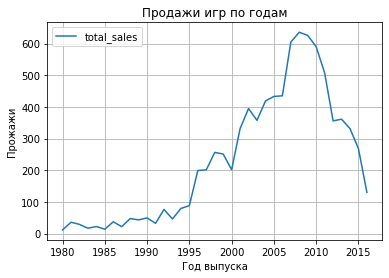

In [50]:
data_sales.plot(grid=True, ylabel='Прожажи', xlabel='Год выпуска', title='Продажи игр по годам')

Из графика видно, что после 1996 года количество игр становится больше до 2008 года. До 1996 года данные не очень информативны, так как ежегодные продажи были низкими, с развитием технологий произошел скачок в ежегодных продажах.

<a id='раздел2.2'></a>
### 2.2 Продажи игр наиболее популярных платформ по годам

Рассмотрим изменения продаж по платформам

In [51]:
platforms = data.groupby(['platform'])['total_sales'].agg(['sum'])
#platforms

In [52]:
platforms = platforms.sort_values(['sum'], ascending=False).head(10)
platforms

,sum
platform,
ps2,1233.559999
x360,961.240000
ps3,931.340000
ds,778.110000
wii,740.350000
ps,727.580000
ps4,314.140000
gba,312.880000
psp,289.530000


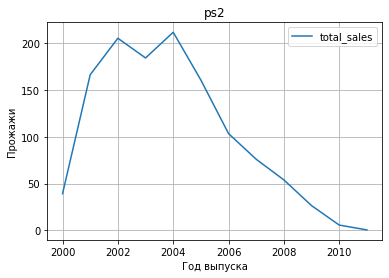

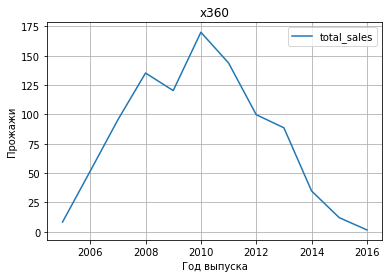

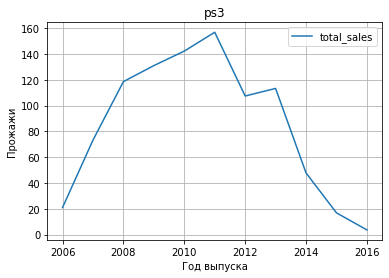

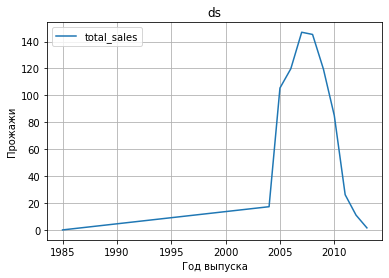

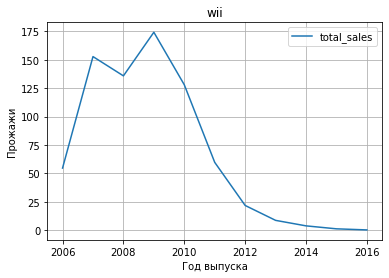

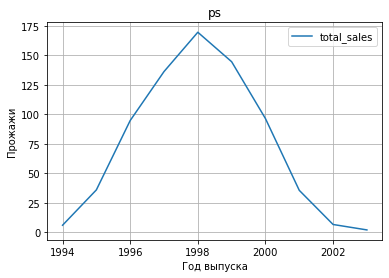

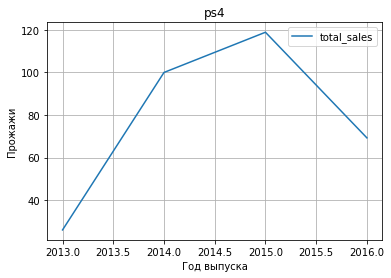

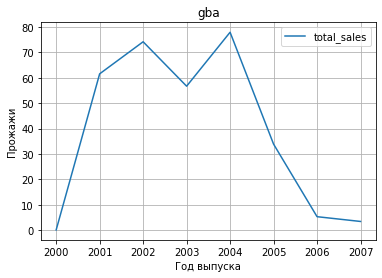

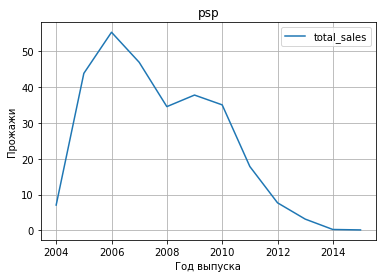

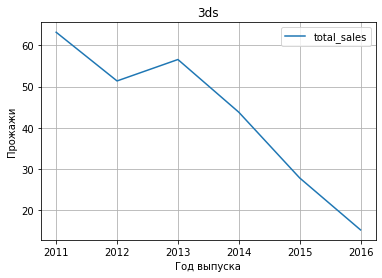

In [53]:
for i in platforms.index:
    data[data['platform'] == i].pivot_table(index='year_of_release',\
    values='total_sales', aggfunc='sum').sort_values(by='year_of_release').plot(grid=True, \
    ylabel='Прожажи', xlabel='Год выпуска', title=i)

**Вывод**

Популярный период платформы - в среднем 5-10 лет.
Следовательно, актуальными платформами будеи считать те, что вышли после 2012 года. 
Так же добавим персональные компьютеры, которые являются актуальными из-за своей модернизации

<a id='раздел2.3'></a>
### 2.3 Актуальные данные

In [54]:
years_of_release = data.groupby(['platform'])['year_of_release'].agg(['min'])
years_of_release = years_of_release[years_of_release['min'] > 2012]
years_of_release.loc['pc'] = 2013

In [55]:
years_of_release

,min
platform,
ps4,2013
xone,2013
pc,2013


In [56]:
actual_platforms = data.query('(platform in @years_of_release.index) and (year_of_release > 2012)')
actual_platforms = actual_platforms.reset_index(drop=True)
actual_platforms.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 828 entries, 0 to 827
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             828 non-null    object 
 1   platform         828 non-null    object 
 2   year_of_release  828 non-null    int32  
 3   genre            828 non-null    object 
 4   na_sales         828 non-null    float64
 5   eu_sales         828 non-null    float64
 6   jp_sales         828 non-null    float32
 7   other_sales      828 non-null    float32
 8   critic_score     828 non-null    int8   
 9   user_score       828 non-null    int8   
 10  rating           828 non-null    object 
 11  total_sales      828 non-null    float64
dtypes: float32(2), float64(3), int32(1), int8(2), object(4)
memory usage: 56.7+ KB


In [57]:
actual_platforms.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,call of duty: black ops 3,ps4,2015,shooter,6.03,5.86,0.36,2.38,-1,-1,other,14.63
1,grand theft auto v,ps4,2014,action,3.96,6.31,0.38,1.97,97,83,m,12.62
2,fifa 16,ps4,2015,sports,1.12,6.12,0.06,1.28,82,43,e,8.58
3,star wars battlefront (2015),ps4,2015,shooter,2.99,3.49,0.22,1.28,-1,-1,other,7.98
4,call of duty: advanced warfare,ps4,2014,shooter,2.81,3.48,0.14,1.23,83,57,m,7.66


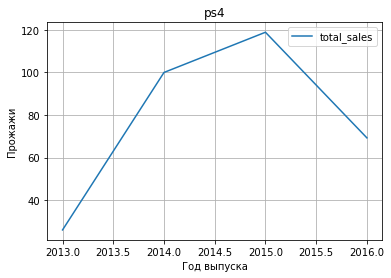

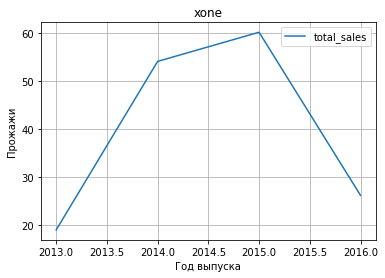

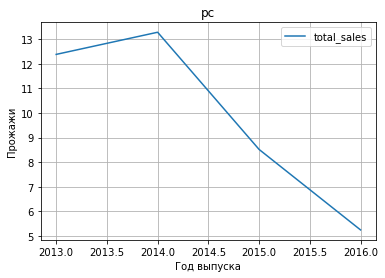

In [58]:
for index in years_of_release.index:
    actual_platforms[actual_platforms['platform'] == index].pivot_table(index='year_of_release', \
    values='total_sales', aggfunc='sum').sort_values(by='year_of_release').plot(title=index, grid=True, \
                                                                                  ylabel='Прожажи', xlabel='Год выпуска')

Среди актуальных платформ нет растущих показателей продаж. На момент 2016 года лидерами являются ps4 и xone. Данные платформы будут актуальны еще лет 5-7.
Не стоит рассматривать ps не стоит, так как данные на момент 2016 гоа достаточно низкие и нет причин для скачка продаж.
Потенциально прибыльные платформы: ps4 и xone.

In [59]:
top_actual_platforms = actual_platforms.query('(platform == "ps4") or (platform == "xone")')
top_actual_platforms = top_actual_platforms.reset_index(drop=True)
top_actual_platforms.info()
top_actual_platforms.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 639 entries, 0 to 638
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             639 non-null    object 
 1   platform         639 non-null    object 
 2   year_of_release  639 non-null    int32  
 3   genre            639 non-null    object 
 4   na_sales         639 non-null    float64
 5   eu_sales         639 non-null    float64
 6   jp_sales         639 non-null    float32
 7   other_sales      639 non-null    float32
 8   critic_score     639 non-null    int8   
 9   user_score       639 non-null    int8   
 10  rating           639 non-null    object 
 11  total_sales      639 non-null    float64
dtypes: float32(2), float64(3), int32(1), int8(2), object(4)
memory usage: 43.8+ KB


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,call of duty: black ops 3,ps4,2015,shooter,6.03,5.86,0.36,2.38,-1,-1,other,14.63
1,grand theft auto v,ps4,2014,action,3.96,6.31,0.38,1.97,97,83,m,12.62
2,fifa 16,ps4,2015,sports,1.12,6.12,0.06,1.28,82,43,e,8.58
3,star wars battlefront (2015),ps4,2015,shooter,2.99,3.49,0.22,1.28,-1,-1,other,7.98
4,call of duty: advanced warfare,ps4,2014,shooter,2.81,3.48,0.14,1.23,83,57,m,7.66


Построим график "ящик с усами" по глобальным продажам игр в разбивке на платформы:

In [60]:
actual_data = data.query('year_of_release > 2012')

<AxesSubplot:xlabel='platform', ylabel='total_sales'>

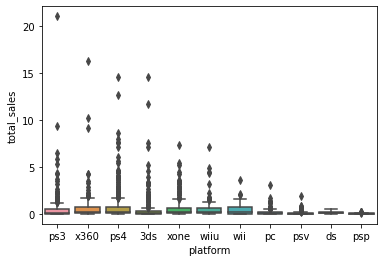

In [61]:
sns.boxplot(x='platform', y='total_sales', data=actual_data)

(0.0, 3.0)

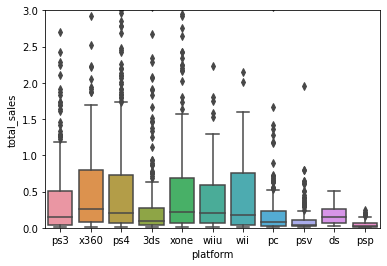

In [62]:
sns.boxplot(x='platform', y='total_sales', data=actual_data).set_ylim([0, 3])

In [63]:
actual_data.groupby(by='platform')['total_sales'].describe()

,count,mean,std,min,25%,50%,75%,max
platform,,,,,,,,
3ds,303.0,0.472772,1.381347,0.01,0.0400,0.090,0.2800,14.60
ds,8.0,0.192500,0.172026,0.03,0.0675,0.150,0.2525,0.51
pc,189.0,0.208624,0.352304,0.01,0.0300,0.080,0.2300,3.05
ps3,345.0,0.525884,1.451939,0.01,0.0400,0.150,0.5100,21.05
ps4,392.0,0.801378,1.609456,0.01,0.0600,0.200,0.7300,14.63
psp,67.0,0.052239,0.059768,0.01,0.0150,0.020,0.0700,0.24
psv,358.0,0.092151,0.153816,0.01,0.0200,0.040,0.1100,1.96
wii,23.0,0.593913,0.915432,0.01,0.0450,0.180,0.7550,3.58
wiiu,115.0,0.562000,1.038778,0.01,0.0600,0.200,0.5950,7.09


Лучший медианный показатель продаж у x360, однако данная платформа не актуальна.

Среди платформ с наибольшими продажами достаточно много аномально успешных игр, которые оказывают сильное влияние на суммарные продажи. Среди актуальных платформ у ps4 встречается большее количество феноменально успешных игр, из-за чего у ps4 продаж примерно в 1.5 раза больше, однако у xone медианное значение продаж на 10% больше. Общие и медианные продажи pc относительно других актуальных платформ достаточно низкие

Рассмотрим влияние отзывов критиков и пользователей на продажи ps4. Построим диаграмму рассеяния:

Корреляция между оценками критиков и продажами = 0.22652606560122013
Корреляция между оценками пользователей и продажами = 0.11344360206138501


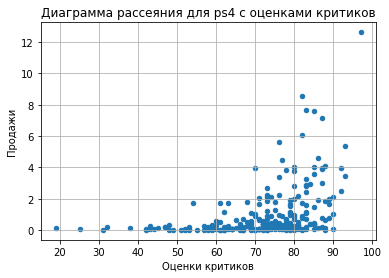

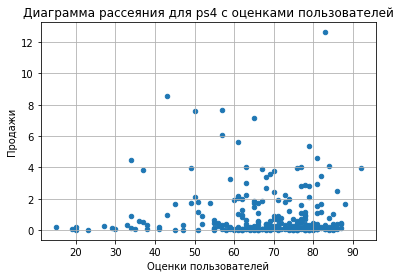

In [64]:
top_actual_platforms.query('platform == "ps4" and critic_score >= 0').plot(x='critic_score', \
    y='total_sales', kind='scatter', grid=True, xlabel='Оценки критиков', ylabel='Продажи', \
                                                        title='Диаграмма рассеяния для ps4 с оценками критиков')

print('Корреляция между оценками критиков и продажами =', top_actual_platforms.\
      query('platform == "ps4"')['critic_score'].corr(top_actual_platforms.query('platform == "ps4"')['total_sales']))

top_actual_platforms.query('platform == "ps4" and user_score >= 0').plot(x='user_score',\
    y='total_sales', kind='scatter', grid=True, xlabel='Оценки пользователей', ylabel='Продажи', \
                                                        title='Диаграмма рассеяния для ps4 с оценками пользователей')

print('Корреляция между оценками пользователей и продажами =', top_actual_platforms.\
      query('platform == "ps4"')['user_score'].corr(top_actual_platforms.query('platform == "ps4"')['total_sales']))

Корреляция между оценками критиков и продажами положительная и более ярко выражена, в то время как корреляция между оценками пользователей и продажами в разы ниже. Это значит, что продажи прямопропорциональны оценкам критиков, но о сильном влиянии на продажи оценок пользователей говорить нельзя. 

Проверим эти взаимосвязи на другой актуальной платформе `xone`, на современной на момент анализа платформе другого производителя `wiiu` и на универсальной и самой распространенной платформе - `pc`

Корреляция между оценками критиков и продажами = 0.2737821725977997
Корреляция между оценками пользователей и продажами = 0.1171512807871208


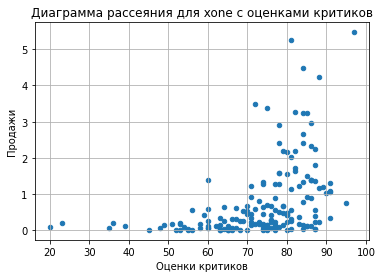

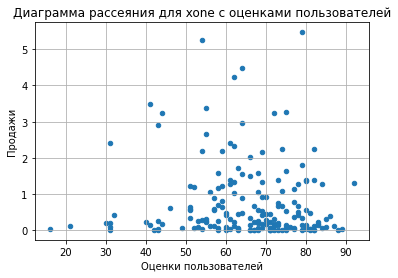

In [65]:
top_actual_platforms.query('platform == "xone" and critic_score >= 0').plot(x='critic_score', \
    y='total_sales', kind='scatter', grid=True, xlabel='Оценки критиков', ylabel='Продажи', \
                                                        title='Диаграмма рассеяния для xone с оценками критиков')

print('Корреляция между оценками критиков и продажами =', top_actual_platforms.\
      query('platform == "xone"')['critic_score'].corr(top_actual_platforms.query('platform == "xone"')['total_sales']))

top_actual_platforms.query('platform == "xone" and user_score >= 0').plot(x='user_score',\
    y='total_sales', kind='scatter', grid=True, xlabel='Оценки пользователей', ylabel='Продажи', \
                                                        title='Диаграмма рассеяния для xone с оценками пользователей')

print('Корреляция между оценками пользователей и продажами =', top_actual_platforms.\
      query('platform == "xone"')['user_score'].corr(top_actual_platforms.query('platform == "xone"')['total_sales']))

Корреляция между оценками критиков и продажами = 0.2971682315692345
Корреляция между оценками пользователей и продажами = 0.26981508880974253


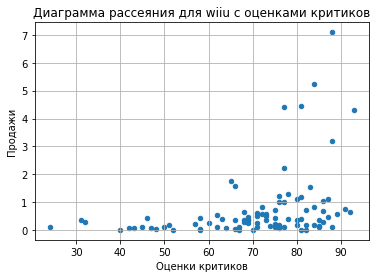

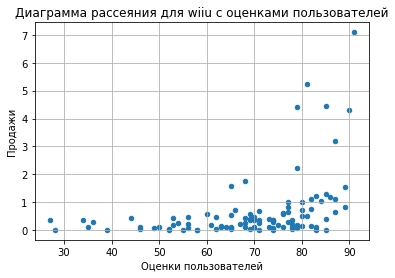

In [66]:
data.query('platform == "wiiu" and critic_score >= 0').plot(x='critic_score', \
    y='total_sales', kind='scatter', grid=True, xlabel='Оценки критиков', ylabel='Продажи', \
                                                        title='Диаграмма рассеяния для wiiu с оценками критиков')

print('Корреляция между оценками критиков и продажами =', data.\
      query('platform == "wiiu"')['critic_score'].corr(data.query('platform == "wiiu"')['total_sales']))

data.query('platform == "wiiu" and user_score >= 0').plot(x='user_score',\
    y='total_sales', kind='scatter', grid=True, xlabel='Оценки пользователей', ylabel='Продажи', \
                                                        title='Диаграмма рассеяния для wiiu с оценками пользователей')

print('Корреляция между оценками пользователей и продажами =', data.\
      query('platform == "wiiu"')['user_score'].corr(data.query('platform == "wiiu"')['total_sales']))

Корреляция между оценками критиков и продажами = 0.21202659312776093
Корреляция между оценками пользователей и продажами = 0.10737666999095473


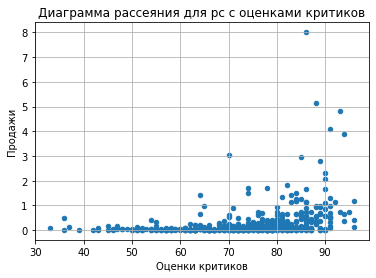

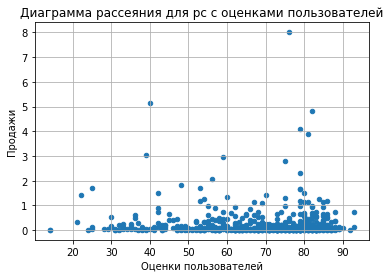

In [67]:
data.query('platform == "pc" and year_of_release > 2006 and critic_score >= 0').plot(x='critic_score', \
    y='total_sales', kind='scatter', grid=True, xlabel='Оценки критиков', ylabel='Продажи', \
                                                        title='Диаграмма рассеяния для pc с оценками критиков')

print('Корреляция между оценками критиков и продажами =', data.\
      query('platform == "pc" and year_of_release > 2006')['critic_score'].corr(data.query('platform == "pc" and year_of_release > 2006')['total_sales']))

data.query('platform == "pc" and year_of_release > 2006 and user_score >= 0').plot(x='user_score',\
    y='total_sales', kind='scatter', grid=True, xlabel='Оценки пользователей', ylabel='Продажи', \
                                                        title='Диаграмма рассеяния для pc с оценками пользователей')

print('Корреляция между оценками пользователей и продажами =', data.\
      query('platform == "pc" and year_of_release > 2006 ')['user_score'].corr(data.query('platform == "pc" and year_of_release > 2006')['total_sales']))

Видим, что у xone и pc показатели схожие, однако у wiiu пользователи очень близки по своим оценкам к критикам, из-за чего корреляция практически идентичная и характерная для оценок критиков. Возможно пользователи платформ этого производителя достаточно объективны и/или более чутко относятся к выставлению оценок. Проверим корреляции для предыдущей платформы этого производителя: wii

Корреляция между оценками критиков и продажами = 0.23995279399514136
Корреляция между оценками пользователей и продажами = 0.23693233301535083


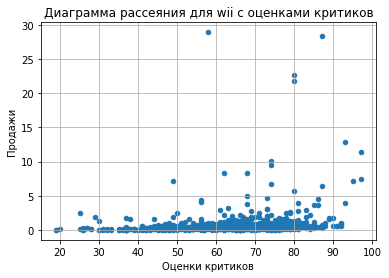

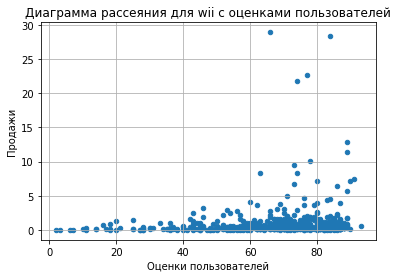

In [68]:
data.query('platform == "wii" and critic_score >= 0').plot(x='critic_score', \
    y='total_sales', kind='scatter', grid=True, xlabel='Оценки критиков', ylabel='Продажи', \
                                                        title='Диаграмма рассеяния для wii с оценками критиков')

print('Корреляция между оценками критиков и продажами =', data.\
      query('platform == "wii"')['critic_score'].corr(data.query('platform == "wii"')['total_sales']))

data.query('platform == "wii" and user_score >= 0').plot(x='user_score',\
    y='total_sales', kind='scatter', grid=True, xlabel='Оценки пользователей', ylabel='Продажи', \
                                                        title='Диаграмма рассеяния для wii с оценками пользователей')

print('Корреляция между оценками пользователей и продажами =', data.\
      query('platform == "wii"')['user_score'].corr(data.query('platform == "wii"')['total_sales']))

Видим, что предположение не подтвердилось. Таким образом можно сказать, что зачастую продажи коррелируют с оценками критиков и не коррелируют с оценками игроков, но изредка могут встретиться исключения. В целом можно резюмировать, что оценки критиков значительно важнее для объема продаж, чем оценки игроков.

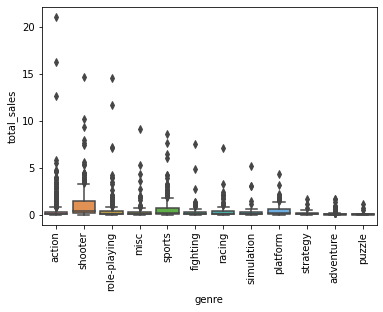

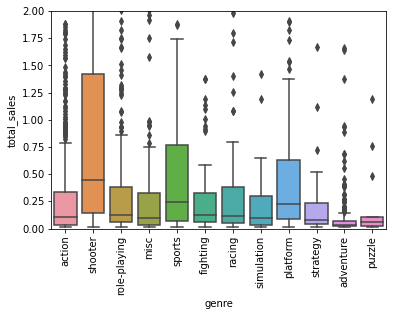

In [69]:
sns.boxplot(x='genre', y='total_sales', data=actual_data)
plt.xticks(rotation = 90) 
plt.show()
sns.boxplot(x='genre', y='total_sales', data=actual_data).set_ylim([0, 2])
plt.xticks(rotation = 90)
plt.show()

In [70]:
actual_data.groupby(by='genre')['total_sales'].describe()

,count,mean,std,min,25%,50%,75%,max
genre,,,,,,,,
action,766.0,0.420196,1.253909,0.01,0.03,0.110,0.3375,21.05
adventure,245.0,0.096490,0.216445,0.01,0.02,0.030,0.0700,1.66
fighting,80.0,0.441375,1.048883,0.01,0.06,0.125,0.3225,7.55
misc,155.0,0.405290,1.007985,0.01,0.03,0.100,0.3300,9.18
platform,74.0,0.576081,0.806808,0.01,0.09,0.225,0.6275,4.32
puzzle,17.0,0.186471,0.325172,0.01,0.02,0.060,0.1100,1.19
racing,85.0,0.469294,0.964101,0.01,0.05,0.120,0.3800,7.09
role-playing,292.0,0.499623,1.353164,0.01,0.06,0.125,0.3825,14.60
shooter,187.0,1.245882,2.014107,0.01,0.14,0.450,1.4250,14.63


Самые устойчиво прибыльные жанры- шутер, платформер и спорт, а наименее прибыльные- симуляторы, приключения и пазлы. Разница в продажах крайне велика, поэтому на жанр необходимо обращать особое внимание. Жанр экшн имеет очень большое количество существенных выбросов.

<a id='глава3'></a>
## 3. Портрет пользователя каждого региона

<a id='раздел3.1'></a>
### 3.1 Североамериканский регион

<a id='раздел3.1.1'></a>
#### 3.1.1 Самые популярные платформы

,sum
platform,
ps4,108.74
xone,93.12
x360,81.66
ps3,63.50
3ds,38.20


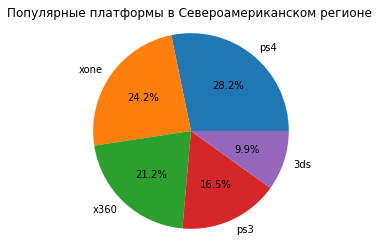

In [97]:
top_platforms_na = actual_data.groupby(['platform'])['na_sales'].agg(['sum']).sort_values(['sum'],ascending=False)
top_platforms_na = top_platforms_na.head(5)
display(top_platforms_na)
fig1, ax1 = plt.subplots()
ax1.pie(top_platforms_na['sum'], labels=top_platforms_na.index, autopct='%1.1f%%')
ax1.axis('equal') 
plt.title('Популярные платформы в Североамериканском регионе')
plt.show()

Основная доля- полноразмерные мощные домашние консоли. При этом в америке японская ps4 несильно впереди американской xone, поскольку это их отечественная платформа и она пользуется там большой популярностью. Также популярна 3ds ввиду своей портативности. А вот ПК для игр используется относительно нечасто. Видимо американцы предпочитают играть за большими телевизорами лежа на удобном диване с беспроводными геймпадами.

<a id='раздел3.1.2'></a>
#### 3.1.2 Популярные жанры

,sum
genre,
action,126.05
shooter,109.74
sports,65.27
role-playing,46.40
misc,27.49


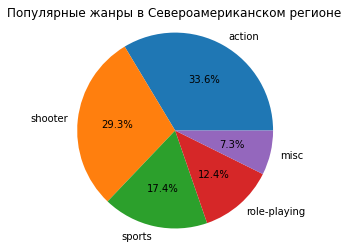

In [98]:
top_genres_na = actual_data.groupby(['genre'])['na_sales'].agg(['sum']).sort_values(['sum'],ascending=False)
top_genres_na = top_genres_na.head(5)
display(top_genres_na)
fig1, ax1 = plt.subplots()
ax1.pie(top_genres_na['sum'], labels=top_genres_na.index, autopct='%1.1f%%')
ax1.axis('equal')  
plt.title('Популярные жанры в Североамериканском регионе')
plt.show()

Самые популярные жанры: экшн, шутер, РПГ, спорт- наиболее распространенные для наиболее популярных в Северной Америке платформ.

<a id='раздел3.1.3'></a>
#### 3.1.3 Влияние рейтинга на продажи

,sum
rating,
m,165.21
other,89.42
e,79.05
e10+,54.24
t,49.79


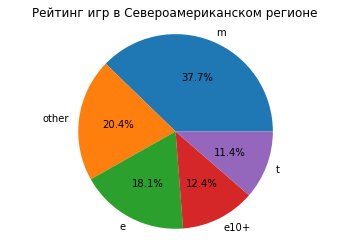

In [99]:
top_rating_na = actual_data.groupby(['rating'])['na_sales'].agg(['sum']).sort_values(['sum'],ascending=False)
display(top_rating_na)
fig1, ax1 = plt.subplots()
ax1.pie(top_rating_na['sum'], labels=top_rating_na.index, autopct='%1.1f%%')
ax1.axis('equal')  
plt.title('Рейтинг игр в Североамериканском регионе')
plt.show()

Из-за популярности "стрелялок" возрастной порог игр достаточно велик: от 17 лет. При этом 80% игр ориентырованы на Северную Америку и Канаду.

**Вывод**

Наилучшие показатели у игр для стационарных флагманских консолей жанров экшн и шутер.

<a id='раздел3.2'></a>
### 3.2 Европейский регион

<a id='раздел3.2.1'></a>
#### 3.2.1 Самые популярные платформы

,sum
platform,
ps4,141.09
ps3,67.81
xone,51.59
x360,42.52
3ds,30.96


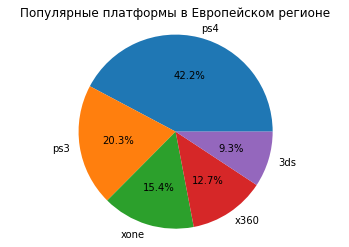

In [100]:
top_platforms_eu = actual_data.groupby(['platform'])['eu_sales'].agg(['sum']).sort_values(['sum'],ascending=False)
top_platforms_eu = top_platforms_eu.head(5)
display(top_platforms_eu)
fig1, ax1 = plt.subplots()
ax1.pie(top_platforms_eu['sum'], labels=top_platforms_eu.index, autopct='%1.1f%%')
ax1.axis('equal')  
plt.title('Популярные платформы в Европейском регионе')
plt.show()

В европе также самая популярная платформа ps4, но уже с большим отрывом, из-за того, что популярность американской консоли xone в европе не так велика, и  частично эта ниша заполнилась ps4. Продажи на xone все еще ниже, чем у консоли ps3 предыдущего поколения. 3ds также популярна в качестве портативной платформы, но все еще на 5м месте.

<a id='раздел3.2.2'></a>
#### 3.2.2 Популярные жанры

,sum
genre,
action,118.13
shooter,87.86
sports,60.52
role-playing,36.97
racing,20.19


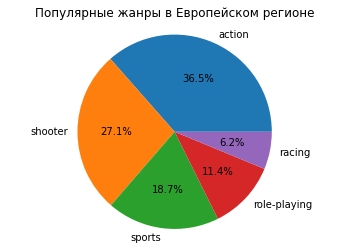

In [101]:
top_genres_eu = actual_data.groupby(['genre'])['eu_sales'].agg(['sum']).sort_values(['sum'],ascending=False)
top_genres_eu = top_genres_eu.head(5)
display(top_genres_eu)
fig1, ax1 = plt.subplots()
ax1.pie(top_genres_eu['sum'], labels=top_genres_eu.index, autopct='%1.1f%%')
ax1.axis('equal')  
plt.title('Популярные жанры в Европейском регионе')
plt.show()

Вследствие отсутсвия радикальной смены баланса полноразмерные консоли-ПК-портативные консоли, ассортимент популярнейших жанров практически идентичен.

<a id='раздел3.2.3'></a>
#### 3.2.3 Влияние рейтинга на продажи

,sum
rating,
m,145.32
e,83.36
other,78.91
e10+,42.69
t,41.95


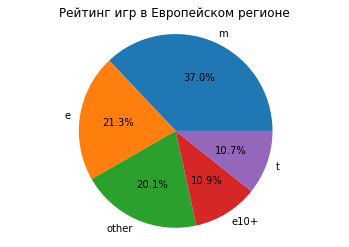

In [102]:
top_rating_eu = actual_data.groupby(['rating'])['eu_sales'].agg(['sum']).sort_values(['sum'],ascending=False)
display(top_rating_eu)
fig1, ax1 = plt.subplots()
ax1.pie(top_rating_eu['sum'], labels=top_rating_eu.index, autopct='%1.1f%%')
ax1.axis('equal')  
plt.title('Рейтинг игр в Европейском регионе')
plt.show()

В Европе возрастной порог примерно такой же, как в Америке.

**Вывод**

В европе игроки предпочитают те же жанры на тех же платформах, но с более строгим возрастным рейтингом.

<a id='раздел3.3'></a>
### 3.3 Японский регион

<a id='раздел3.3.1'></a>
#### 3.3.1 Самые популярные платформы

,sum
platform,
3ds,67.809998
ps3,23.350000
psv,18.590000
ps4,15.960000
wiiu,10.880000


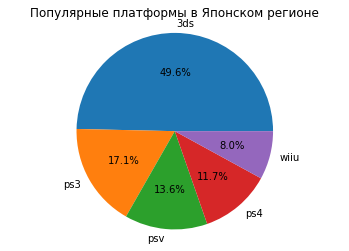

In [96]:
top_platforms_jp = actual_data.groupby(['platform'])['jp_sales'].agg(['sum']).sort_values(['sum'],ascending=False)
top_platforms_jp = top_platforms_jp.head(5)
display(top_platforms_jp)
fig1, ax1 = plt.subplots()
ax1.pie(top_platforms_jp['sum'], labels=top_platforms_jp.index, autopct='%1.1f%%')
ax1.axis('equal')  
plt.title('Популярные платформы в Японском регионе')
plt.show()

В японии картина топа платформ радикально меняется: из-за трудоголичного менталитета и бешенного ритма жизни, японцам некогда расслабляться дома, они играют находу- в портативные платформы, поэтому с огромным отрывом лидирует 3ds, а psv, ранее даже не входившая в топ-5 платформ по региону, в Японии на втором месте в топе. Из домашних консолей они также предпочитают отечественные варианты: ps4 и wiiu. На ПК японцы в основном работают, а не играют.

<a id='раздел3.3.2'></a>
#### 3.3.2 Популярные жанры

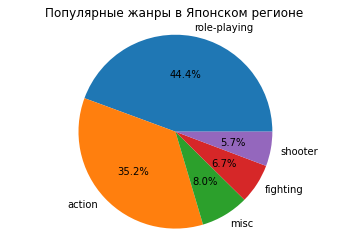

In [103]:
top_genres_jp = actual_data.groupby(['genre'])['jp_sales'].agg(['sum']).sort_values(['sum'],ascending=False)
top_genres_jp = top_genres_jp.head(5)
fig1, ax1 = plt.subplots()
ax1.pie(top_genres_jp['sum'], labels=top_genres_jp.index, autopct='%1.1f%%')
ax1.axis('equal') 
plt.title('Популярные жанры в Японском регионе')
plt.show()

Из-за смены формата популярнейших платформ, поменялся и топ жанров- на портативных устройствах совсем неудобно играть в шутер или спортивные симуляторы, а вот РПГ и экшн- куда более распространенные жанры. Также видим первое появление в топе жанра fighting.

<a id='раздел3.3.3'></a>
#### 3.3.3 Влияние рейтинга на продажи

,sum
rating,
other,85.050003
t,20.590000
e,15.140000
m,14.110000
e10+,5.890000


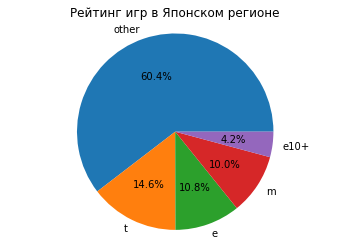

In [104]:
top_rating_jp = actual_data.groupby(['rating'])['jp_sales'].agg(['sum']).sort_values(['sum'],ascending=False)
display(top_rating_jp)
fig1, ax1 = plt.subplots()
ax1.pie(top_rating_jp['sum'], labels=top_rating_jp.index, autopct='%1.1f%%')
ax1.axis('equal')  
plt.title('Рейтинг игр в Японском регионе')
plt.show()

В Японии игры с рейтингом от ESRB занимают меньше 40% рынка, что говорит о доминировании игр собственного производства.

**Вывод**

В Японии следует делать основной акцент на играх для портативных консолей жанра РПГ.

Сводка по графикам:

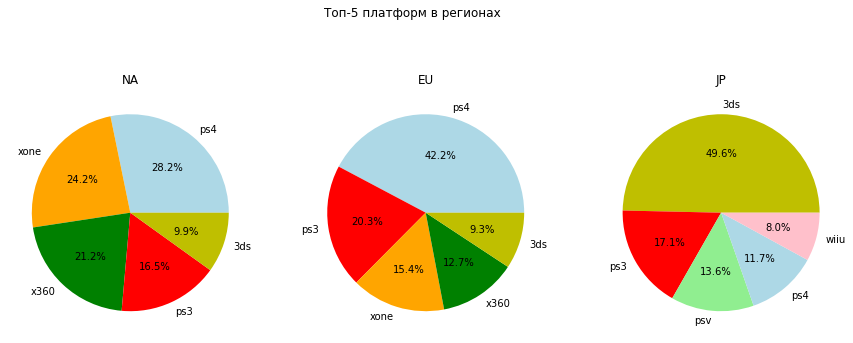

In [80]:
colors = {'ps4': 'lightblue', 'xone': 'orange', 'x360': 'g', 'ps3': 'r', '3ds': 'y', 'psv': 'lightgreen', 'wiiu': 'pink'} 
fig, axes = plt.subplots(1, 3, figsize=(15,6))
plt.suptitle("Топ-5 платформ в регионах")

for ax, df, title in zip(axes, (top_platforms_na, top_platforms_eu, top_platforms_jp), ('NA', 'EU', 'JP')):
    ax.pie(df['sum'], labels=df.index, autopct='%1.1f%%', colors=[colors[c] for c in df.index])
    ax.set_title(title)

Основная доля в Америке- полноразмерные мощные домашние консоли. При этом в америке японская ps4 несильно впереди американской xone, поскольку это их отечественная платформа и она пользуется там большой популярностью. Также популярна 3ds ввиду своей портативности. А вот ПК для игр используется относительно нечасто. Видимо американцы предпочитают играть за большими телевизорами лежа на удобном диване с беспроводными геймпадами.

В европе также самая популярная платформа ps4, но уже с большим отрывом, из-за того, что популярность американской консоли xone в европе не так велика, и  частично эта ниша заполнилась ps4. Продажи на xone все еще ниже, чем у консоли ps3 предыдущего поколения. 3ds также популярна в качестве портативной платформы, но все еще на 5м месте.

В японии картина топа платформ радикально меняется: из-за трудоголичного менталитета и бешенного ритма жизни, японцам некогда расслабляться дома, они играют находу- в портативные платформы, поэтому с огромным отрывом лидирует 3ds, а psv, ранее даже не входившая в топ-5 платформ по региону, в Японии на втором месте в топе. Из домашних консолей они также предпочитают отечественные варианты: ps и wiiu. На ПК японцы в основном работают, а не играют.

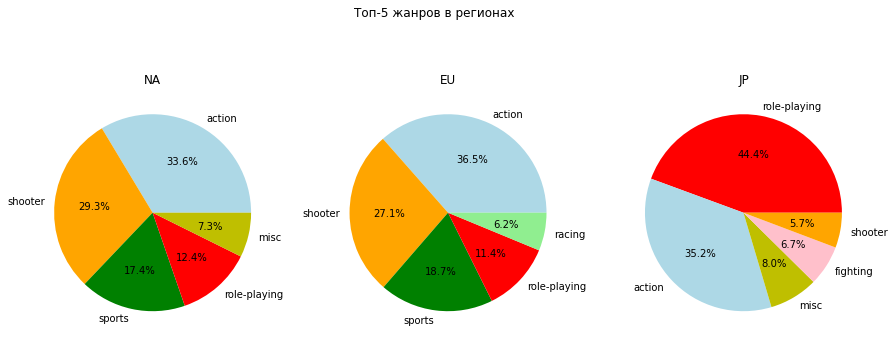

In [81]:
colors = {'action': 'lightblue', 'shooter': 'orange', 'sports': 'g', 'role-playing': 'r', 'misc': 'y', 'racing': 'lightgreen', 'fighting': 'pink'} 
fig, axes = plt.subplots(1, 3, figsize=(15,6))
plt.suptitle("Топ-5 жанров в регионах")

for ax, df, title in zip(axes, (top_genres_na, top_genres_eu, top_genres_jp), ('NA', 'EU', 'JP')):
    ax.pie(df['sum'], labels=df.index, autopct='%1.1f%%', colors=[colors[c] for c in df.index])
    ax.set_title(title)

Самые популярные жанры в Америке: экшн, шутер, РПГ, спорт- наиболее распространенные для наиболее популярных в Северной Америке платформ.

Вследствие отсутсвия радикальной смены баланса полноразмерные консоли-ПК-портативные консоли, в Европе ассортимент популярнейших жанров практически идентичен.

Из-за смены формата популярнейших платформ, в Японии поменялся и топ жанров- на портативных устройствах совсем неудобно играть в шутер или спортивные симуляторы, а вот РПГ и экшн- куда более распространенные жанры. Также видим первое появление в топе жанра fighting.

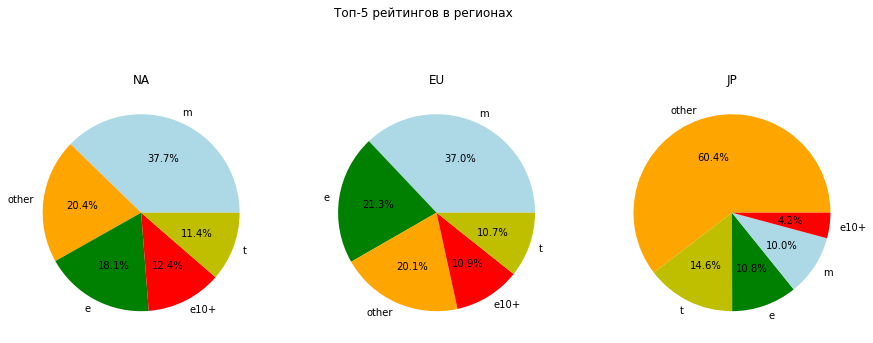

In [106]:
colors = {'m': 'lightblue', 'other': 'orange', 'e': 'g', 'e10+': 'r', 't': 'y'} 
fig, axes = plt.subplots(1, 3, figsize=(15,6))
plt.suptitle("Топ-5 рейтингов в регионах")

for ax, df, title in zip(axes, (top_rating_na, top_rating_eu, top_rating_jp), ('NA', 'EU', 'JP')):
    ax.pie(df['sum'], labels=df.index, autopct='%1.1f%%', colors=[colors[c] for c in df.index])
    ax.set_title(title)

Из-за популярности "стрелялок" возрастной порог игр достаточно велик: от 17 лет. При этом 80% игр ориентырованы на Северную Америку и Канаду. Это касается как Америки, так и Европы. В Японии игры с рейтингом от ESRB занимают меньше 40% рынка, что говорит о доминировании игр собственного производства.

**Вывод**

Наилучшие показатели у игр для стационарных флагманских консолей жанра шутер с рейтингом 17+. Это касается Америки и Европы. В Японии следует делать основной акцент на играх для портативных консолей жанра РПГ.

<a id='глава4'></a>
## 4 Проверка гипотез

<a id='раздел4.1'></a>
### 4.1 Первая гипотеза - Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

Размер выборки по pc = 155
Размер выборки по xone = 182


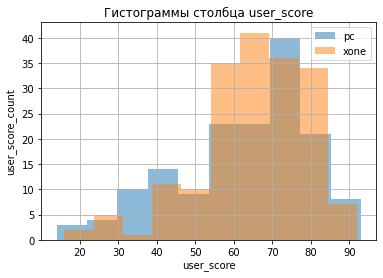

In [83]:
pc_user_score_count = actual_data.query('platform == "pc" and user_score >= 0')['user_score'].count()
print(f'Размер выборки по pc = {pc_user_score_count}')
xone_user_score_count = actual_data.query('platform == "xone" and user_score >= 0')['user_score'].count()
print(f'Размер выборки по xone = {xone_user_score_count}')
hist = actual_data.query('platform == "pc" and user_score >= 0')['user_score'].hist(bins=10, alpha=0.5)
actual_data.query('platform == "xone" and user_score >= 0')['user_score'].hist(bins=10, alpha=0.5)
hist.set_xlabel("user_score")
hist.set_ylabel("user_score_count")
plt.legend(['pc', 'xone'])
plt.title('Гистограммы столбца user_score')
plt.show()

В качестве нулевой гипотезы принимается равенство двух показателей, поэтому проверяем, равна ли средние пользовательских оценок у двух платформ между собой. Альтернативная гипотеза звучит как "неравна", поскольку нам не важно, строго меньше или строго больше одно среднее относительно другого.
Для проверки гипотез использовали критерий о равенстве средних двух генеральных совокупностей, поскольку считаем что мы обладаем случайной выборкой из генеральных совокупностей для каждой платформы и выборочные средние распределены нормально.
Размеры выборок разные, поэтому применим t-тест для двух генеральных совокупностей с параметром `equal_var = False`

In [84]:
alpha = 0.05
score_results = st.ttest_ind(
    actual_data.query('platform == "pc" and user_score >= 0')['user_score'], 
    actual_data.query('platform == "xone" and user_score >= 0')['user_score'],
    equal_var = False) 

print('p-значение:', score_results.pvalue) 

if (score_results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.1475959401343053
Не получилось отвергнуть нулевую гипотезу


**Вывод**

Средние пользовательские рейтинги платформ Xbox One и PC одинаковые. Нулевая гипотеза подтверждена.

<a id='раздел4.2'></a>
### 4.2 Вторая гипотеза - Средние пользовательские рейтинги жанров Action и Sports разные

Размер выборки по action = 389
Размер выборки по sports = 160


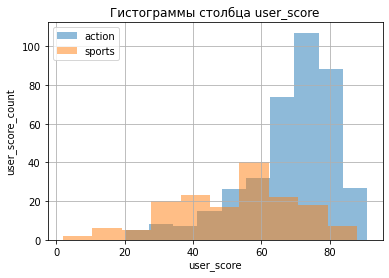

In [85]:
action_user_score_count = actual_data.query('genre == "action" and user_score >= 0')['user_score'].count()
print(f'Размер выборки по action = {action_user_score_count}')
sports_user_score_count = actual_data.query('genre == "sports" and user_score >= 0')['user_score'].count()
print(f'Размер выборки по sports = {sports_user_score_count}')
hist = actual_data.query('genre == "action" and user_score >= 0')['user_score'].hist(bins=10, alpha=0.5)
actual_data.query('genre == "sports" and user_score >= 0')['user_score'].hist(bins=10, alpha=0.5)
hist.set_xlabel("user_score")
hist.set_ylabel("user_score_count")
plt.legend(['action', 'sports'])
plt.title('Гистограммы столбца user_score')
plt.show()

В качестве нулевой гипотезы принимается равенство двух показателей, поэтому проверяем, равна ли средние пользовательских оценок у двух жанров между собой. Альтернативная гипотеза звучит как "неравна", поскольку нам не важно, строго меньше или строго больше одно среднее относительно другого.
Для проверки гипотез использовали критерий о равенстве средних двух генеральных совокупностей, поскольку считаем что мы обладаем случайной выборкой из генеральных совокупностей для каждого жанра и выборочные средние распределены нормально.
Размеры выборок разные, поэтому применим t-тест для двух генеральных совокупностей с параметром `equal_var = False`

In [86]:
alpha = 0.05
score_results = st.ttest_ind(
    actual_data.query('genre == "action" and user_score >= 0')['user_score'], 
    actual_data.query('genre == "sports" and user_score >= 0')['user_score'],
    equal_var = False) 

print('p-значение:', score_results.pvalue) 

if (score_results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 1.4460039700704734e-20
Отвергаем нулевую гипотезу


**Вывод**

Средние пользовательские рейтинги жанров экшн и спорт разные. Нулевая гипотеза отвергнута.

<a id='глава5'></a>
### 5 Вывод

1. Предобработка данных
- Привели к нижнему регистру названия столбцов.
- Все столбцы били исследованы на аномалии. 
- В столбце `user_score` обнаружено аномальное значение  `tbd` - аббревиатура от 'to be determined'- будет определено, то есть один из вариантов обозначения пропуска, эти значения были заменены на Nan.
- В `rating` присутствует неявный дубликат: 'E' ("Everyone", 1998-н.в.) и 'K-A' ("Kids to Adults", 1994-1997 гг.)- обозначение возрастной категории 6+, устаревшее значение было заменено.
- Были удалены строки, в которых отсутствовало название игры.
- Были удалены строки, в которых отсутствовал год релиза `year_of_release`.
- Столбец `user_score` привели в тип `float64`, затем все значения умножили на 10, чтобы оценки пользователей и экспертов были в одном числоыом диапозоне. 
- Для заплолнения пропусков выдвенем гипотезу: средняя оценка критиков равна средней оценке пользователей. Если гипотеза верна, гипотеза не подтвердтлась, поэтому пропуски заполнили характерным значением: `-1`.
- В столбце `rating` пропуски заполнили характерным значением: `other`.
- Изменены типы данных у столбцов `year_of_release`, `critic_score`, `user_score`, `jp_sales`, `other_sales`.
- Дубликаты в таблице не найдены, все значения уникальны.
- Добавили в таблицу столбец `total_sales` со значениями общих продаж.

2. Исследовательский анализ данных
- Продажи по годам. Построили график продаж от года. Из графика видно, что данные до 1996 года не очень важны, поскольку до этого ежегодные продажи оставались примерно на одном низком уровне, а с 1996 года, в связи с развитием технологий, произошел скачок ежегодных продаж.

- Вывели топ-6 платформ: ps2, x360, ps3, wii, ds, ps

- Продажи на всех платформах падают

- Корреляция между оценками критиков и продажами положительная и более ярко выражена, в то время как корреляция между оценками пользователей и продажами в разы ниже. Это значит, что продажи прямопропорциональны оценкам критиков, но о сильном влиянии на продажи оценок пользователей говорить нельзя. 

- у xone и pc показатели схожие. Зачастую продажи коррелируют с оценками критиков и не коррелируют с оценками игроков, но изредка могут встретиться исключения. В целом можно резюмировать, что оценки критиков значительно важнее для объема продаж, чем оценки игроков.

- Самые устойчиво прибыльные жанры- шутер, платформер и спорт, а наименее прибыльные- симуляторы, приключения и пазлы. Разница в продажах крайне велика, поэтому на жанр необходимо обращать особое внимание. Жанр экшн имеет очень большое количество существенных выбросов.

- Основная доля в Америке- полноразмерные мощные домашние консоли. При этом в америке японская ps4 несильно впереди американской xone, поскольку это их отечественная платформа и она пользуется там большой популярностью. Также популярна 3ds ввиду своей портативности. А вот ПК для игр используется относительно нечасто. Видимо американцы предпочитают играть за большими телевизорами лежа на удобном диване с беспроводными геймпадами.

- В европе также самая популярная платформа ps4, но уже с большим отрывом, из-за того, что популярность американской консоли xone в европе не так велика, и  частично эта ниша заполнилась ps4. Продажи на xone все еще ниже, чем у консоли ps3 предыдущего поколения. 3ds также популярна в качестве портативной платформы, но все еще на 5м месте.

- В японии картина топа платформ радикально меняется: из-за трудоголичного менталитета и бешенного ритма жизни, японцам некогда расслабляться дома, они играют находу- в портативные платформы, поэтому с огромным отрывом лидирует 3ds, а psv, ранее даже не входившая в топ-5 платформ по региону, в Японии на втором месте в топе. Из домашних консолей они также предпочитают отечественные варианты: ps и wiiu. На ПК японцы в основном работают, а не играют.

- Самые популярные жанры в Америке: экшн, шутер, РПГ, спорт- наиболее распространенные для наиболее популярных в Северной Америке платформ.

- Вследствие отсутсвия радикальной смены баланса полноразмерные консоли-ПК-портативные консоли, в Европе ассортимент популярнейших жанров практически идентичен.

- Из-за смены формата популярнейших платформ, в Японии поменялся и топ жанров- на портативных устройствах совсем неудобно играть в шутер или спортивные симуляторы, а вот РПГ и экшн- куда более распространенные жанры. Также видим первое появление в топе жанра fighting.

- Из-за популярности "стрелялок" возрастной порог игр достаточно велик: от 17 лет. При этом 80% игр ориентырованы на Северную Америку и Канаду. Это касается как Америки, так и Европы. В Японии игры с рейтингом от ESRB занимают меньше 40% рынка, что говорит о доминировании игр собственного производства.

- Наилучшие показатели у игр для стационарных флагманских консолей жанра шутер с рейтингом 17+. Это касается Америки и Европы. В Японии следует делать основной акцент на играх для портативных консолей жанра РПГ.

- Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

- Средние пользовательские рейтинги жанров экшн и спорт разные.